In [1]:
#라이브러리 로드
import pandas as pd

In [6]:
df = pd.read_csv('./data/subwayfee.csv', encoding='cp949') 

In [7]:
df.head()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
0,2022-08,1호선,150,서울역,"1,167,657","1,130,901","180,626","172,177",2022-09-03 10:18:23
1,2022-08,1호선,151,시청,"544,893","557,176","89,898","88,059",2022-09-03 10:18:23
2,2022-08,1호선,152,종각,"854,020","836,751","133,088","123,352",2022-09-03 10:18:23
3,2022-08,1호선,153,종로3가,"431,220","393,760","277,589","261,412",2022-09-03 10:18:23
4,2022-08,1호선,154,종로5가,"378,532","385,585","238,475","229,206",2022-09-03 10:18:23


## * 유임 승차 비율이 가장 높은 역은 어디?

In [8]:
df.head()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
0,2022-08,1호선,150,서울역,"1,167,657","1,130,901","180,626","172,177",2022-09-03 10:18:23
1,2022-08,1호선,151,시청,"544,893","557,176","89,898","88,059",2022-09-03 10:18:23
2,2022-08,1호선,152,종각,"854,020","836,751","133,088","123,352",2022-09-03 10:18:23
3,2022-08,1호선,153,종로3가,"431,220","393,760","277,589","261,412",2022-09-03 10:18:23
4,2022-08,1호선,154,종로5가,"378,532","385,585","238,475","229,206",2022-09-03 10:18:23


### EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     617 non-null    object
 1   호선명     617 non-null    object
 2   역ID     617 non-null    int64 
 3   지하철역    617 non-null    object
 4   유임승차    617 non-null    object
 5   유임하차    617 non-null    object
 6   무임승차    617 non-null    object
 7   무임하차    617 non-null    object
 8   작업일시    617 non-null    object
dtypes: int64(1), object(8)
memory usage: 43.5+ KB


In [11]:
# 통계적 정보
df.describe()

,역ID
count,617.000000
mean,1928.145867
std,1205.032659
min,150.000000
25%,1204.000000
50%,1846.000000
75%,2637.000000
max,4713.000000


In [12]:
# 데이터 중복여부
df['지하철역'].value_counts() 

지하철역
서울역               5
공덕                4
동대문역사문화공원(DDP)    3
고속터미널             3
홍대입구              3
                 ..
정왕                1
신길온천              1
안산                1
초지                1
관악산(서울대)          1
Name: count, Length: 526, dtype: int64

In [13]:
df['지하철역'] == '서울역'

0       True
1      False
2      False
3      False
4      False
       ...  
612    False
613    False
614    False
615    False
616    False
Name: 지하철역, Length: 617, dtype: bool

In [14]:
df[df['지하철역'] == '서울역'] #중복 데이터가 아님!

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
0,2022-08,1호선,150,서울역,"1,167,657","1,130,901","180,626","172,177",2022-09-03 10:18:23
111,2022-08,4호선,426,서울역,"270,602","479,888","35,704","44,605",2022-09-03 10:18:23
120,2022-08,경부선,1001,서울역,"246,839","70,773","13,293","2,816",2022-09-03 10:18:23
326,2022-08,경의선,1291,서울역,"98,709","123,369","14,353","17,548",2022-09-03 10:18:23
566,2022-08,공항철도 1호선,4201,서울역,"261,344","244,162","31,322","27,197",2022-09-03 10:18:23


In [15]:
df['지하철역'].unique() # 중복 데이터 제외하고 유일한 데이터만 보이기

array(['서울역', '시청', '종각', '종로3가', '종로5가', '동대문', '신설동', '제기동',
       '청량리(서울시립대입구)', '동묘앞', '을지로입구', '을지로3가', '을지로4가', '동대문역사문화공원(DDP)',
       '신당', '상왕십리', '왕십리(성동구청)', '한양대', '뚝섬', '성수', '건대입구', '구의(광진구청)',
       '강변(동서울터미널)', '잠실나루', '잠실(송파구청)', '잠실새내', '종합운동장', '삼성(무역센터)',
       '선릉', '역삼', '강남', '교대(법원.검찰청)', '서초', '방배', '사당', '낙성대(강감찬)',
       '서울대입구(관악구청)', '봉천', '신림', '신대방', '구로디지털단지', '대림(구로구청)', '신도림',
       '문래', '영등포구청', '당산', '합정', '홍대입구', '신촌', '이대', '아현', '충정로(경기대입구)',
       '용답', '신답', '도림천', '양천구청', '신정네거리', '용두(동대문구청)', '지축', '구파발',
       '연신내', '불광', '녹번', '홍제', '무악재', '독립문', '경복궁(정부서울청사)', '안국', '충무로',
       '동대입구', '약수', '금호', '옥수', '압구정', '신사', '잠원', '고속터미널',
       '남부터미널(예술의전당)', '양재(서초구청)', '매봉', '도곡', '대치', '학여울', '대청', '일원',
       '수서', '가락시장', '경찰병원', '오금', '당고개', '상계', '노원', '창동', '쌍문',
       '수유(강북구청)', '미아(서울사이버대학)', '미아사거리', '길음', '성신여대입구(돈암)',
       '한성대입구(삼선교)', '혜화', '명동', '회현(남대문시장)', '숙대입구(갈월)', '삼각지', '신용산',
       '이촌(국립중앙박물관)', '동작(현충

In [16]:
len(df['지하철역'].unique()) #유일한 데이터 몇개?

526

In [17]:
df['호선명'].unique() 

array(['1호선', '2호선', '3호선', '4호선', '경부선', '경인선', '경원선', '안산선', '과천선',
       '분당선', '일산선', '중앙선', '장항선', '경의선', '경춘선', '수인선', '경강선', '5호선',
       '6호선', '7호선', '8호선', '9호선', '공항철도 1호선', '9호선2~3단계', '우이신설선', '신림선'],
      dtype=object)

In [18]:
type(df['호선명'].unique())

numpy.ndarray

In [19]:
df['호선명'].unique()

array(['1호선', '2호선', '3호선', '4호선', '경부선', '경인선', '경원선', '안산선', '과천선',
       '분당선', '일산선', '중앙선', '장항선', '경의선', '경춘선', '수인선', '경강선', '5호선',
       '6호선', '7호선', '8호선', '9호선', '공항철도 1호선', '9호선2~3단계', '우이신설선', '신림선'],
      dtype=object)

In [20]:
df['호선명'].unique().size #넘파이 타입일때 사용하는 것

26

In [21]:
len(df['호선명'].unique()) #파이썬 내장 함수

26

In [24]:
# 쉼표 제거 및 숫자로 변환
df['유임승차'] = df['유임승차'].str.replace(',', '').astype(float)
df['무임승차'] = df['무임승차'].str.replace(',', '').astype(float)

In [25]:
df['유임승차'] / (df['유임승차'] + df['무임승차'])

0      0.866033
1      0.858382
2      0.865174
3      0.608373
4      0.613497
         ...   
612    0.732929
613    0.698681
614    0.759355
615    0.733135
616    0.561216
Length: 617, dtype: float64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사용월     617 non-null    object 
 1   호선명     617 non-null    object 
 2   역ID     617 non-null    int64  
 3   지하철역    617 non-null    object 
 4   유임승차    617 non-null    float64
 5   유임하차    617 non-null    object 
 6   무임승차    617 non-null    float64
 7   무임하차    617 non-null    object 
 8   작업일시    617 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 43.5+ KB


In [27]:
df['유임승차비율'] = df['유임승차'] / (df['유임승차'] + df['무임승차'])


In [28]:
df.head()


,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,유임승차비율
0,2022-08,1호선,150,서울역,1167657.0,"1,130,901",180626.0,"172,177",2022-09-03 10:18:23,0.866033
1,2022-08,1호선,151,시청,544893.0,"557,176",89898.0,"88,059",2022-09-03 10:18:23,0.858382
2,2022-08,1호선,152,종각,854020.0,"836,751",133088.0,"123,352",2022-09-03 10:18:23,0.865174
3,2022-08,1호선,153,종로3가,431220.0,"393,760",277589.0,"261,412",2022-09-03 10:18:23,0.608373
4,2022-08,1호선,154,종로5가,378532.0,"385,585",238475.0,"229,206",2022-09-03 10:18:23,0.613497


In [29]:
#유임승차 비율이 높은순대로 정렬

df.sort_values(by='유임승차비율',ascending=False)

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,유임승차비율
237,2022-08,분당선,1031,복정,13.0,0,0.0,0,2022-09-03 10:18:23,1.000000
192,2022-08,경원선,1022,창동,10.0,0,0.0,0,2022-09-03 10:18:23,1.000000
521,2022-08,7호선,2760,굴포천,2.0,0,0.0,0,2022-09-03 10:18:23,1.000000
522,2022-08,7호선,2761,부평구청,3.0,0,0.0,0,2022-09-03 10:18:23,1.000000
519,2022-08,7호선,2758,상동,2.0,0,0.0,0,2022-09-03 10:18:23,1.000000
...,...,...,...,...,...,...,...,...,...,...
295,2022-08,중앙선,1219,용문,33480.0,"33,582",37976.0,"37,890",2022-09-03 10:18:23,0.468540
9,2022-08,1호선,159,동묘앞,116233.0,"122,982",133024.0,"134,234",2022-09-03 10:18:23,0.466318
296,2022-08,중앙선,1220,지평,943.0,"1,034",1130.0,"1,107",2022-09-03 10:18:23,0.454896
7,2022-08,1호선,157,제기동,216929.0,"208,260",262097.0,"282,283",2022-09-03 10:18:23,0.452854


> * 무임승차가 0인 겨우 유임승차비율이 1로 나타납니다. 
> * 무임승차가 0이 아닌 경우로 한정해서 다시 정렬해야할 것 같습니다. 

In [30]:
df['무임승차'] > 0


0      True
1      True
2      True
3      True
4      True
       ... 
612    True
613    True
614    True
615    True
616    True
Name: 무임승차, Length: 617, dtype: bool

In [31]:
df[ df['무임승차'] > 0 ].sort_values(by='유임승차비율',ascending=False)


,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,유임승차비율
440,2022-08,6호선,2615,연신내,52.0,0,2.0,0,2022-09-03 10:18:23,0.962963
568,2022-08,공항철도 1호선,4203,홍대입구,334381.0,"344,582",17164.0,"16,166",2022-09-03 10:18:23,0.951176
48,2022-08,2호선,239,홍대입구,1717050.0,"1,851,268",90063.0,"86,905",2022-09-03 10:18:23,0.950162
120,2022-08,경부선,1001,서울역,246839.0,"70,773",13293.0,"2,816",2022-09-03 10:18:23,0.948899
570,2022-08,공항철도 1호선,4206,마곡나루(서울식물원),216283.0,"206,531",12852.0,"12,660",2022-09-03 10:18:23,0.943911
...,...,...,...,...,...,...,...,...,...,...
295,2022-08,중앙선,1219,용문,33480.0,"33,582",37976.0,"37,890",2022-09-03 10:18:23,0.468540
9,2022-08,1호선,159,동묘앞,116233.0,"122,982",133024.0,"134,234",2022-09-03 10:18:23,0.466318
296,2022-08,중앙선,1220,지평,943.0,"1,034",1130.0,"1,107",2022-09-03 10:18:23,0.454896
7,2022-08,1호선,157,제기동,216929.0,"208,260",262097.0,"282,283",2022-09-03 10:18:23,0.452854


> * 유동인구 자체가 적은 역이 유임승차비율이 높은것으로 나타납니다. 
> * 유동인구가 많은 역을 대상으로 분석해야 할 것 같습니다. 

In [32]:
#유임승차와 무임승차를 모두 합해서 10만명을 초과하는 역만 대상

df_10 = df[(df['유임승차'] + df['무임승차']) > 100000]

In [33]:
df_10.sort_values(by='유임승차비율',ascending=False).head(10)


,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,유임승차비율
568,2022-08,공항철도 1호선,4203,홍대입구,334381.0,"344,582",17164.0,"16,166",2022-09-03 10:18:23,0.951176
48,2022-08,2호선,239,홍대입구,1717050.0,"1,851,268",90063.0,"86,905",2022-09-03 10:18:23,0.950162
120,2022-08,경부선,1001,서울역,246839.0,"70,773",13293.0,"2,816",2022-09-03 10:18:23,0.948899
570,2022-08,공항철도 1호선,4206,마곡나루(서울식물원),216283.0,"206,531",12852.0,"12,660",2022-09-03 10:18:23,0.943911
565,2022-08,9호선,4125,신논현,790971.0,"787,147",48569.0,"46,859",2022-09-03 10:18:23,0.942148
555,2022-08,9호선,4115,여의도,721152.0,"680,330",46281.0,"42,069",2022-09-03 10:18:23,0.939694
457,2022-08,6호선,2632,한강진,224575.0,"266,059",14949.0,"14,544",2022-09-03 10:18:23,0.937589
571,2022-08,공항철도 1호선,4207,김포공항,337165.0,"182,448",22741.0,"14,639",2022-09-03 10:18:23,0.936814
18,2022-08,2호선,209,한양대,177378.0,"188,876",11994.0,"12,537",2022-09-03 10:18:23,0.936664
31,2022-08,2호선,222,강남,2073808.0,"2,018,576",146482.0,"127,762",2022-09-03 10:18:23,0.934026


> * 한양대, 홍대입구 같은 대학 근처 역과 
> * 서울이나 논현,강남과 같은 사람들이 많이 다니는 곳의 유임승차 비율이 높은 것 같습니다. 

In [34]:
df_10 = df_10.sort_values(by='유임승차비율',ascending=False)


In [35]:
df_10.head()


,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,유임승차비율
568,2022-08,공항철도 1호선,4203,홍대입구,334381.0,"344,582",17164.0,"16,166",2022-09-03 10:18:23,0.951176
48,2022-08,2호선,239,홍대입구,1717050.0,"1,851,268",90063.0,"86,905",2022-09-03 10:18:23,0.950162
120,2022-08,경부선,1001,서울역,246839.0,"70,773",13293.0,"2,816",2022-09-03 10:18:23,0.948899
570,2022-08,공항철도 1호선,4206,마곡나루(서울식물원),216283.0,"206,531",12852.0,"12,660",2022-09-03 10:18:23,0.943911
565,2022-08,9호선,4125,신논현,790971.0,"787,147",48569.0,"46,859",2022-09-03 10:18:23,0.942148


In [36]:
df_10=df_10.reset_index(drop=True) 

#인덱스 재 라벨링 drop=True: 기존의 인덱스가 컬럼이 되는것을 삭제

In [37]:
df_10.head()


,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시,유임승차비율
0,2022-08,공항철도 1호선,4203,홍대입구,334381.0,"344,582",17164.0,"16,166",2022-09-03 10:18:23,0.951176
1,2022-08,2호선,239,홍대입구,1717050.0,"1,851,268",90063.0,"86,905",2022-09-03 10:18:23,0.950162
2,2022-08,경부선,1001,서울역,246839.0,"70,773",13293.0,"2,816",2022-09-03 10:18:23,0.948899
3,2022-08,공항철도 1호선,4206,마곡나루(서울식물원),216283.0,"206,531",12852.0,"12,660",2022-09-03 10:18:23,0.943911
4,2022-08,9호선,4125,신논현,790971.0,"787,147",48569.0,"46,859",2022-09-03 10:18:23,0.942148


In [38]:
line = df_10.iloc[0,1]
subname = df_10.iloc[0,3]
rate = df_10.iloc[0,-1]

print('유임 승차 비율이 가장 높은 역은? {} {} {:.2f}%'.format(subname,line,rate*100))

유임 승차 비율이 가장 높은 역은? 홍대입구 공항철도 1호선 95.12%


In [39]:
line


'공항철도 1호선'

## 모든 역의 유무임 승하차 비율은 어떻게 될까?

In [40]:
#라이브러리 로드
import pandas as pd

#데이터 로드
df = pd.read_csv('./data/subwayfee.csv',encoding='cp949',thousands=',')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     617 non-null    object
 1   호선명     617 non-null    object
 2   역ID     617 non-null    int64 
 3   지하철역    617 non-null    object
 4   유임승차    617 non-null    int64 
 5   유임하차    617 non-null    int64 
 6   무임승차    617 non-null    int64 
 7   무임하차    617 non-null    int64 
 8   작업일시    617 non-null    object
dtypes: int64(5), object(4)
memory usage: 43.5+ KB


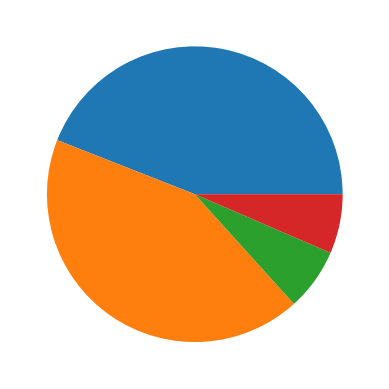

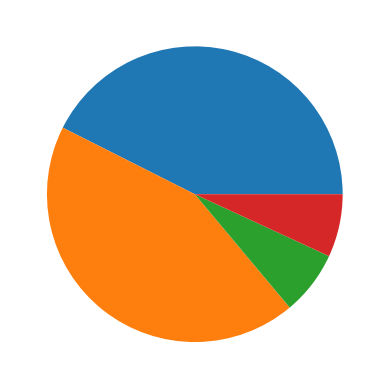

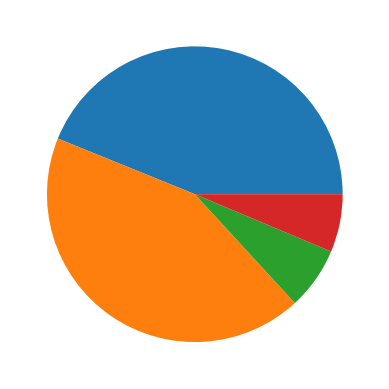

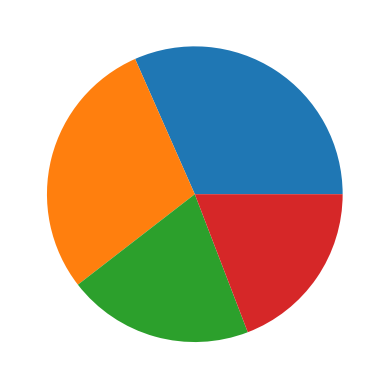

In [42]:
import matplotlib.pyplot as plt

for i,row in enumerate(df.values):
    plt.pie(row[4:8]) #유무임 승하차 컬럼 슬라이스
    plt.show()
    if i ==3: break # 일단 4개만 출력

In [43]:
plt.rc('font',family='Malgun Gothic')     #맑은 고딕을 기본 글꼴로 설정, macOS일 경우,'AppleGothic' 
#plt.rc('font', family='AppleGothic')     #맥
plt.rcParams['axes.unicode_minus']=False  #마이너스 기호 깨짐 방지

In [44]:
for i, row in enumerate(df.values):
    # print(i,row[3],row[1])
    print(f'{row[3]} {row[1]}의 유무임 승하차 비율')

서울역 1호선의 유무임 승하차 비율
시청 1호선의 유무임 승하차 비율
종각 1호선의 유무임 승하차 비율
종로3가 1호선의 유무임 승하차 비율
종로5가 1호선의 유무임 승하차 비율
동대문 1호선의 유무임 승하차 비율
신설동 1호선의 유무임 승하차 비율
제기동 1호선의 유무임 승하차 비율
청량리(서울시립대입구) 1호선의 유무임 승하차 비율
동묘앞 1호선의 유무임 승하차 비율
시청 2호선의 유무임 승하차 비율
을지로입구 2호선의 유무임 승하차 비율
을지로3가 2호선의 유무임 승하차 비율
을지로4가 2호선의 유무임 승하차 비율
동대문역사문화공원(DDP) 2호선의 유무임 승하차 비율
신당 2호선의 유무임 승하차 비율
상왕십리 2호선의 유무임 승하차 비율
왕십리(성동구청) 2호선의 유무임 승하차 비율
한양대 2호선의 유무임 승하차 비율
뚝섬 2호선의 유무임 승하차 비율
성수 2호선의 유무임 승하차 비율
건대입구 2호선의 유무임 승하차 비율
구의(광진구청) 2호선의 유무임 승하차 비율
강변(동서울터미널) 2호선의 유무임 승하차 비율
잠실나루 2호선의 유무임 승하차 비율
잠실(송파구청) 2호선의 유무임 승하차 비율
잠실새내 2호선의 유무임 승하차 비율
종합운동장 2호선의 유무임 승하차 비율
삼성(무역센터) 2호선의 유무임 승하차 비율
선릉 2호선의 유무임 승하차 비율
역삼 2호선의 유무임 승하차 비율
강남 2호선의 유무임 승하차 비율
교대(법원.검찰청) 2호선의 유무임 승하차 비율
서초 2호선의 유무임 승하차 비율
방배 2호선의 유무임 승하차 비율
사당 2호선의 유무임 승하차 비율
낙성대(강감찬) 2호선의 유무임 승하차 비율
서울대입구(관악구청) 2호선의 유무임 승하차 비율
봉천 2호선의 유무임 승하차 비율
신림 2호선의 유무임 승하차 비율
신대방 2호선의 유무임 승하차 비율
구로디지털단지 2호선의 유무임 승하차 비율
대림(구로구청) 2호선의 유무임 승하차 비율
신도림 2호선의 유무임 승하차 비율
문래 2호선의 유무임 승하차 비율
영등포구청 2호선의 유무임 승하차 비율
당산

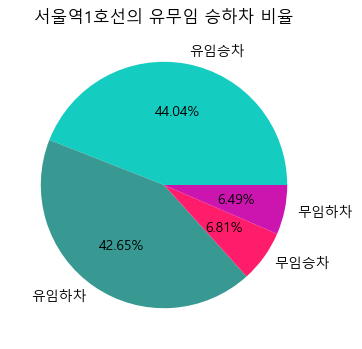

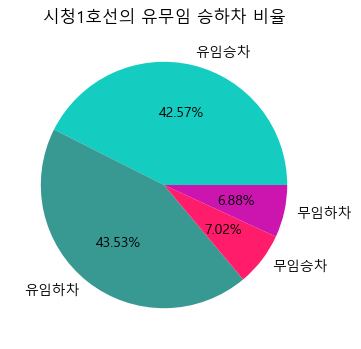

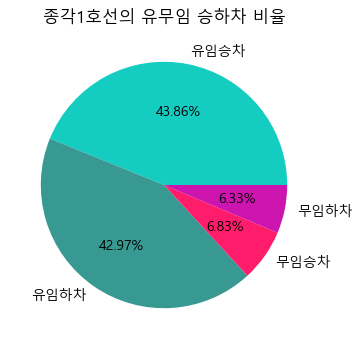

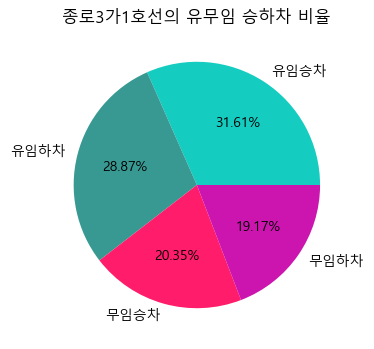

In [45]:
label = ['유임승차','유임하차','무임승차','무임하차']
c = ['#14CCC0', '#389993', '#FF1C6A', '#CC14AF']


for i,row in enumerate(df.values):
    
    plt.figure(figsize=(4,4))    
    plt.pie(row[4:8], labels = label , autopct='%.2f%%', colors=c)
    
    plt.title(f'{row[3]}{row[1]}의 유무임 승하차 비율')
    plt.show()
    if i ==3: break # 일단 4개만 출력

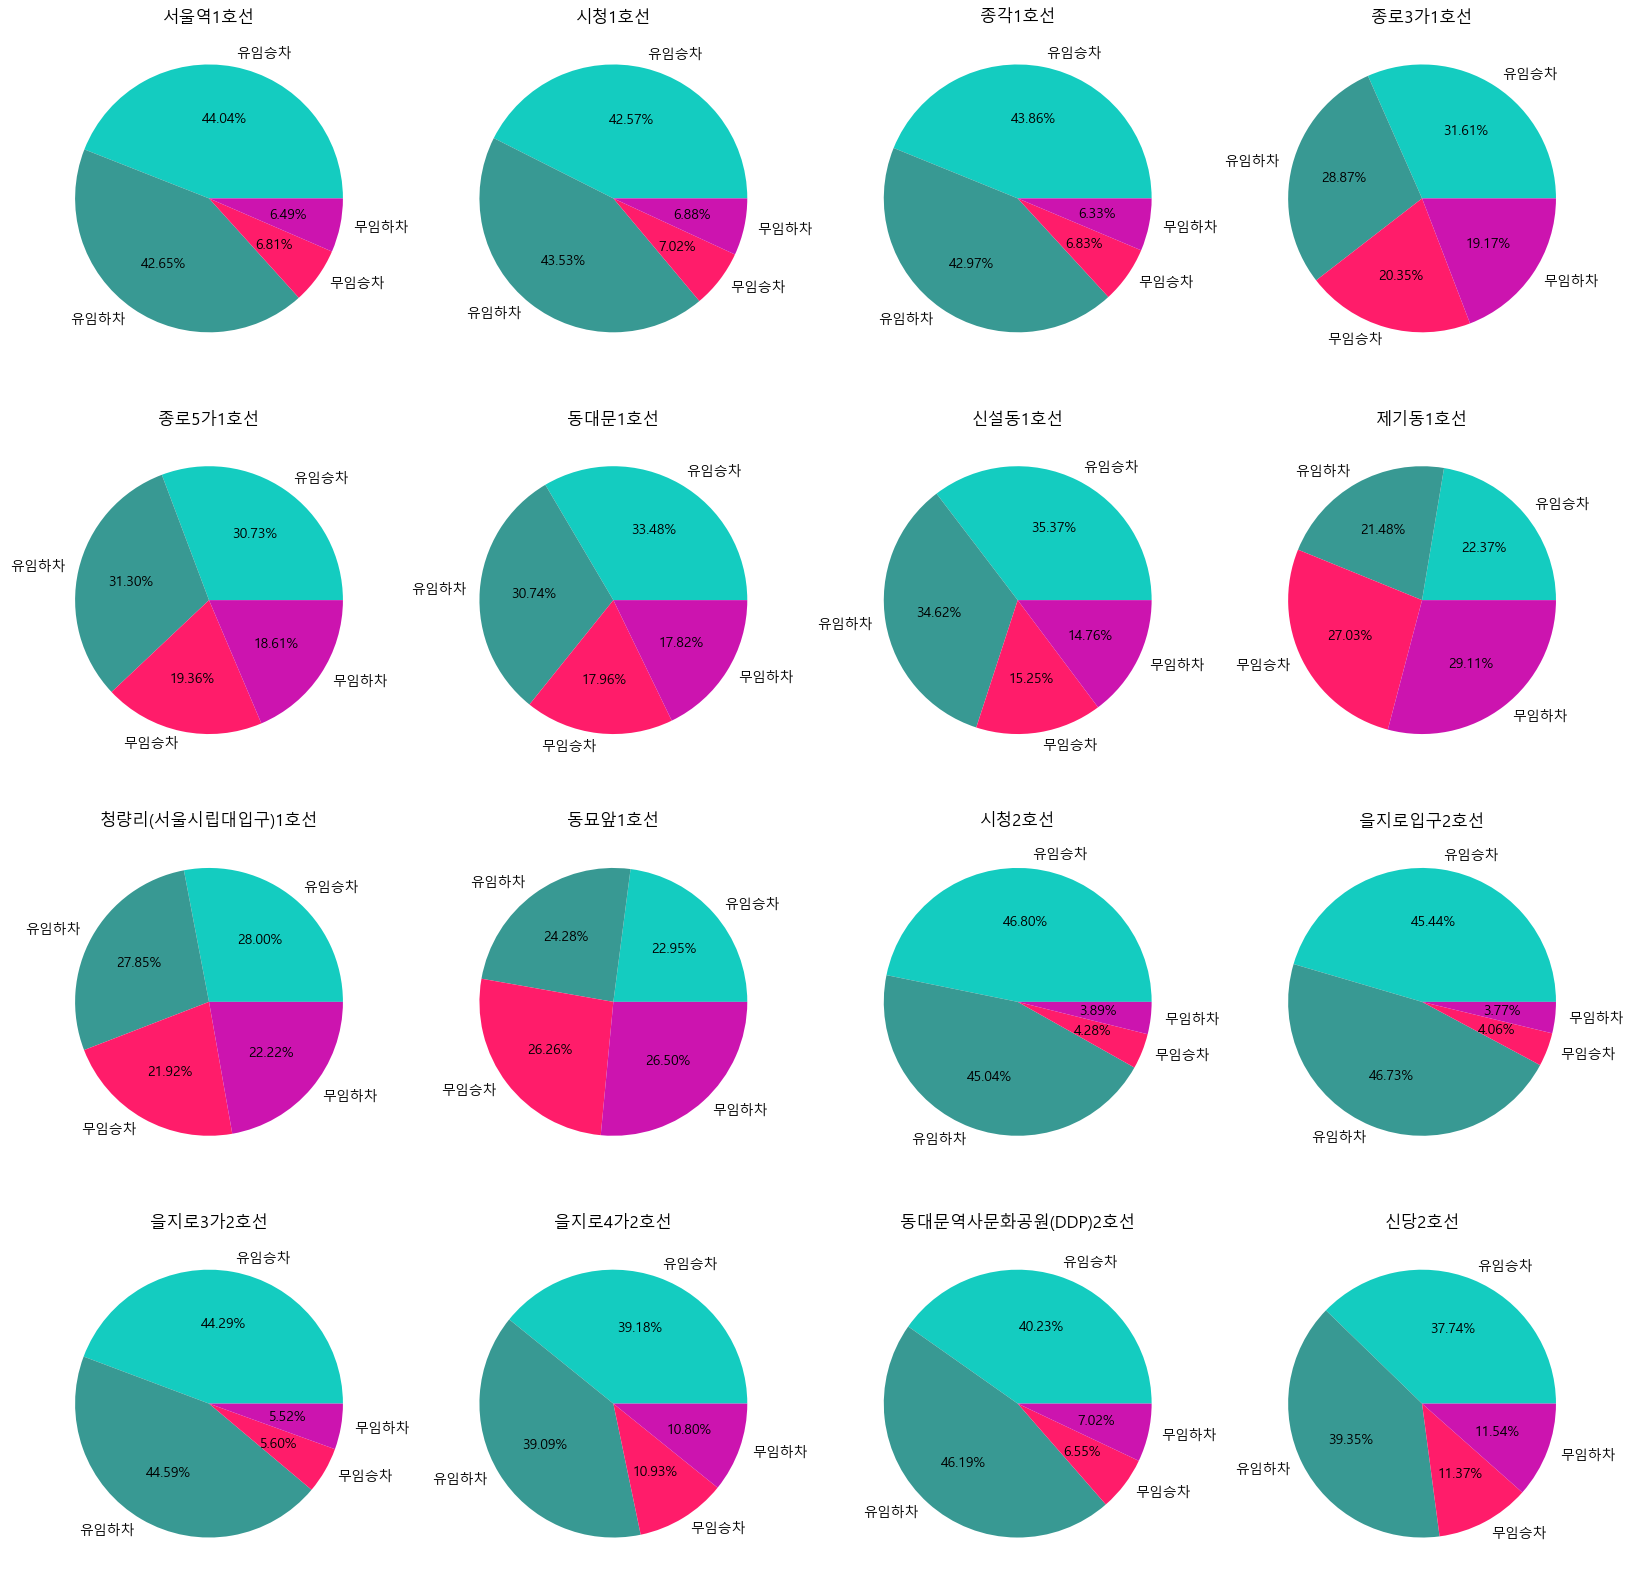

In [46]:
label = ['유임승차','유임하차','무임승차','무임하차']
c = ['#14CCC0', '#389993', '#FF1C6A', '#CC14AF']

plt.figure(figsize=(20,20))   
for i,row in enumerate(df.values):
    
    plt.subplot(4, 4, i + 1)            #plt.subplot(가로수, 세로수, 나는 어디?)
    plt.pie(row[4:8], labels = label , autopct='%.2f%%', colors=c)
    
    plt.title(f'{row[3]}{row[1]}')
 
    if i == 15: break # 일단 4개만 출력
    
plt.show()